In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
import matplotlib.pyplot as plt

ex = x_train[142].reshape(28,28)

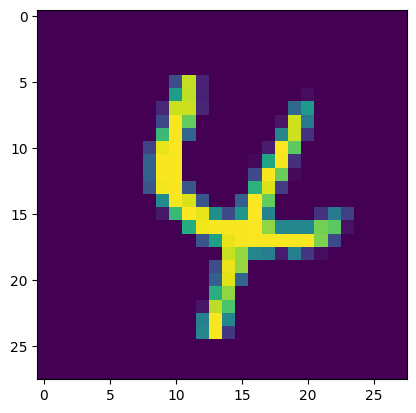

In [25]:
plt.imshow(ex)

In [26]:
y_train[142]

4

In [27]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Ensure that labels are one-dimensional and in integer format
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Reshape the data to 4D tensors
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoded vectors
#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1393 - accuracy: 0.9578
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0470 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0257 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0197 - accuracy: 0.9940


In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test Accuracy : ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9889
Test Accuracy :  0.9889000058174133


In [30]:
# Choose an image from the dataset to classify
image_index = 3132
image = x_test[image_index]
actual_label = y_test[image_index]

In [32]:
# Reshape the image to match the input shape of the model
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)

# Normalize the pixel values
image = image.astype('float32')
image /= 255

In [33]:
pred = model.predict(image)

1/1 [==============================] - 0s 44ms/step


In [36]:
# Get the predicted label
predicted_label = np.argmax(pred)

In [37]:
print(predicted_label)
print(actual_label)

1
1


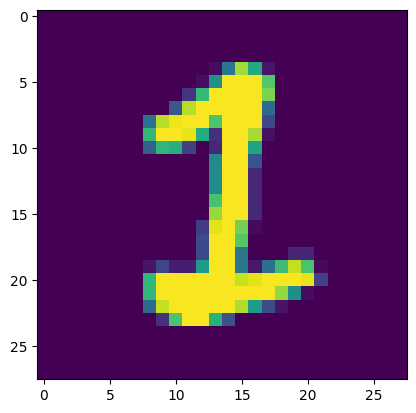

In [38]:
plt.imshow(image.reshape(28,28))